# Derivation of numerical data

## Scope

* Finite number $N$ of data points $(x,y)$ are available, its discribe a function $f(x)$: compute the derivative $\dfrac{df}{dx}$


https://en.wikipedia.org/wiki/Numerical_differentiation

In [1]:
#setup
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


## Introduction ...

## Create synthetic data

In [2]:
def f(x):
    return (x**2-3*x+2*np.sin(5*x))

In [3]:
N = 400
xmin, xmax = 0., 4
x = np.linspace(xmin, xmax, N)

<IPython.core.display.Javascript object>


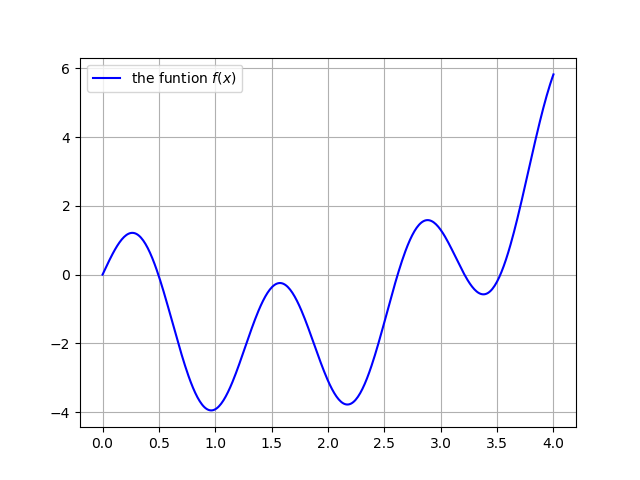

In [4]:
fig = plt.figure()
plt.plot(x,f(x),'b',label = "the funtion $f(x)$")
plt.legend()
plt.grid()

For this test we assume that only 40 points of this function are known:

In [5]:
N = 40
xmin, xmax = 0., 4
xi = np.linspace(xmin, xmax, N)
fi = f(xi)

<IPython.core.display.Javascript object>


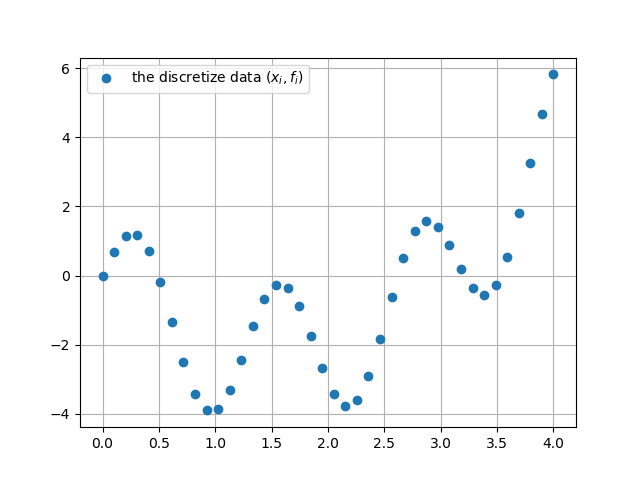

In [6]:
fig = plt.figure()
plt.plot(xi,fi,'o',label = "the discretize data $(x_i,f_i)$")
plt.legend()
plt.grid()

The analytical function is konwn for this test, so let's compute the analytical derivative:

In [7]:
def df(x):
    return 2*x - 3 + 10 * np.cos(5*x)

<IPython.core.display.Javascript object>


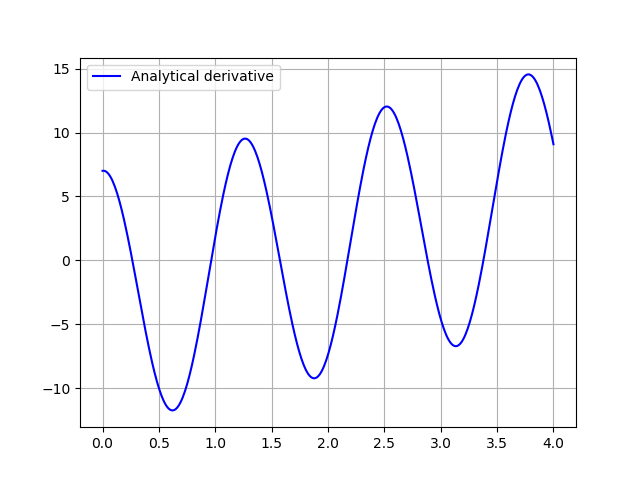

In [8]:
fig = plt.figure()
plt.plot(x,df(x),'b',label = "Analytical derivative")
plt.legend()
plt.grid()

## The one point finite difference formula

$\dfrac{df}{dx} = \dfrac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}$ 

The numpy diff() function is a fast way to compute this formula:

In [9]:
df_1p = np.diff(fi)/np.diff(xi)

But becarefull the size of the resulting array n-1.

<IPython.core.display.Javascript object>


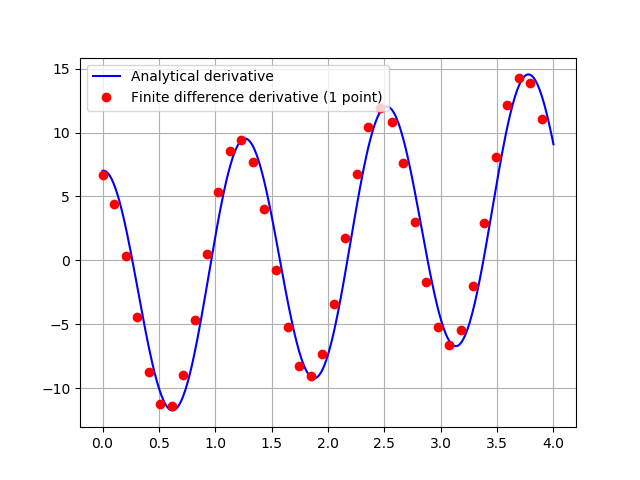

In [10]:
fig = plt.figure()
plt.plot(x,df(x),'b',label = "Analytical derivative")
plt.plot(xi[:-1],df_1p,'ro',label = "Finite difference derivative (1 point)")
plt.legend()
plt.grid()

## The 2 points finite difference formula

$\dfrac{df}{dx} = \dfrac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}$ 

In [11]:
df_2p = (fi[2:] - fi[:-2])/(xi[2:] - xi[:-2])

<IPython.core.display.Javascript object>


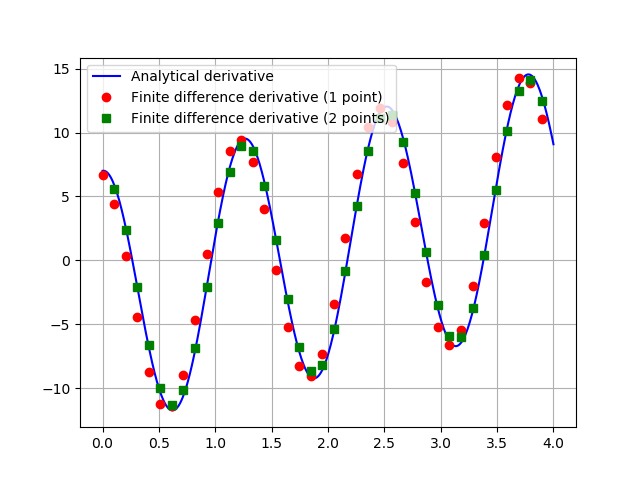

In [12]:
fig = plt.figure()
plt.plot(x,df(x),'b',label = "Analytical derivative")
plt.plot(xi[:-1],df_1p,'ro',label = "Finite difference derivative (1 point)")
plt.plot(xi[1:-1],df_2p,'gs',label = "Finite difference derivative (2 points)")
plt.legend()
plt.grid()

## Let's have a look at the error on the derivative computation

<IPython.core.display.Javascript object>


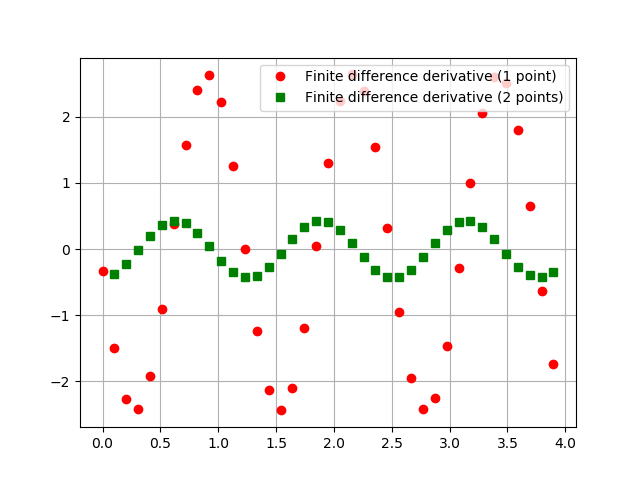

In [13]:
fig = plt.figure()
plt.plot(xi[:-1],(df_1p-df(xi[:-1])),'ro',label = "Finite difference derivative (1 point)")
plt.plot(xi[1:-1],(df_2p-df(xi[1:-1])),'gs',label = "Finite difference derivative (2 points)")
plt.legend()
plt.grid()

## What append if the data are noisy ?

In [14]:
fi = fi + np.random.randn(fi.size)